### Importing Libraries and IBMQ Account

In [1]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_7204\104988094.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-04-27 15:16:53,357: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Setting up the Quantum Circuit

In [4]:
num = int(input("Enter a Number: "))
x = np.binary_repr(num)
print(x)
c = q.QuantumCircuit(len(x)+1,len(x))
c.h(list(range(len(x))))
c.x(len(x))
c.h(len(x))
c.barrier()
for i, j in enumerate(x):
    if j == "1":
        c.cx(i , len(x))

c.barrier()

c.h(list(range(len(x))))
c.measure(list(range(len(x))) , list(range(len(x)))[::-1] )
c.draw()

Enter a Number:  5


101


┌───┐      ░            ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├──────
     ├───┤      ░   │        ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     2  1  0

### Simulating the Quantum Circuit

Counts = {'101': 1024}
Your number was 5 and Number of shots = 1024


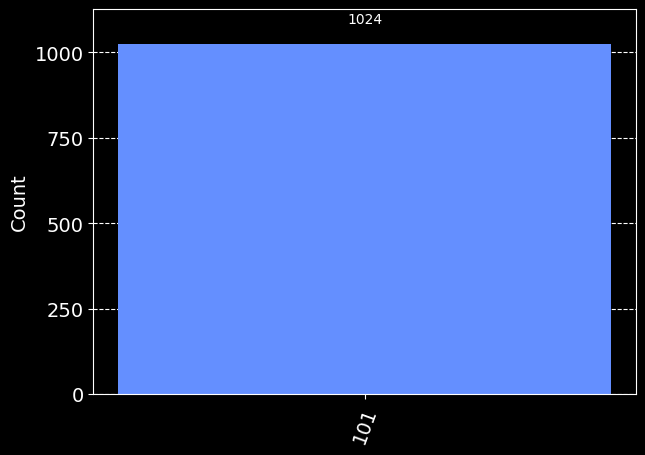

In [5]:
qasm_b = q.Aer.get_backend("qasm_simulator")
counts = q.execute(c, qasm_b, shots = 1024).result().get_counts()
print("Counts =", counts)
for i in counts:
    a = int(str(i),2)

print("Your number was", a, "and Number of shots =", 1024)
qv.plot_histogram(counts)

### Running the Quantum Circuit using Quantum Computer

In [18]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(c, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


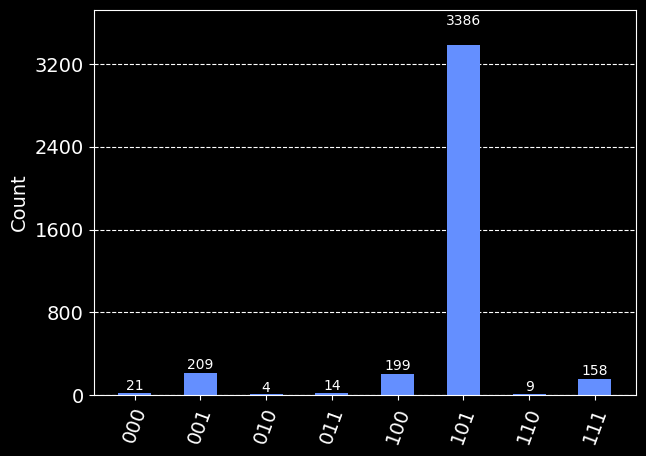

In [19]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)